<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Build_regression_and_discretizer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compare decision tree and linear regression models

In [2]:
import numpy
#create data
def create_data():
  random = numpy.random.RandomState(42)
  x = random.uniform(-3, 3, size = 100)
  y_no_randomness = (numpy.sin(3*x) + x)
  y = (y_no_randomness + random.normal(size=len(x))) / 2
  return x.reshape(-1, 1), y

X, y = create_data()  

In [3]:
print(X)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]
 [-0.66793626]
 [-1.37190581]
 [ 1.97242505]
 [-0.85948004]
 [-1.31439294]
 [ 0.2561765 ]
 [-2.15445

In [4]:
print(y)

[-0.71927944  1.68597842  0.31211026 -0.20828425 -1.09608346 -0.80797977
 -1.08427853  0.99096301  0.38364414  0.08948738 -1.33758189  1.98552794
  0.58506141 -0.15955191 -0.64207511 -0.18958672 -0.7518895   0.12594502
 -0.87062019 -1.06906714  0.93544887 -1.05322723 -0.33876911 -0.85391158
 -1.19491248  0.18881958 -0.68782375 -0.23172249  0.69445564 -1.6348037
  1.73278742 -0.72846005 -1.6759149   1.79672361  0.86957103  0.57774349
 -0.37274008 -0.38459003  0.36966058 -0.46909922 -1.39973612 -0.64216159
 -1.25757664  2.04598179  0.13794205  0.14012881  0.25907318 -0.46401154
  0.80614282  0.43645662  1.32656481  0.05658084  1.8675105   1.29957912
  0.00923734  1.78306762 -2.21658146 -0.31280946 -2.2967383   0.25218889
 -1.17944769 -0.43337845  1.21407147 -1.31209946 -0.18423636  1.12919902
 -1.97057161  0.62537411 -1.63684377  2.15845174 -0.29292947 -1.18513794
 -1.4727128   0.8105451   0.4710376   0.4448476  -0.01895328 -1.65304233
 -0.5578967  -1.80461406  2.14719565  1.00528505 -1.

In [5]:
#create and score decision tree model
from sklearn.tree import DecisionTreeRegressor

decision_model = DecisionTreeRegressor(min_samples_leaf = 3).fit(X,y)

import matplotlib.pyplot as plt

X_test = numpy.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

score = decision_model.predict(X_test)



In [6]:
#create and score linear regression model

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X,y)

linear_results = linear_model.predict(X_test)

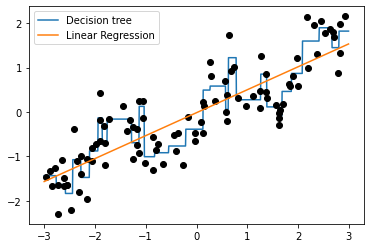

In [7]:
plt.plot(X_test, score, label = "Decision tree")

plt.plot(X[:, 0], y, 'o', c='k')

plt.plot(X_test, linear_results, label = "Linear Regression")

plt.legend()

Bin data with Kbins Discretizer

In [8]:
#import and train discretizer
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')

discretizer.fit(X)

print(discretizer.bin_edges_)

[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [9]:
#Bin data
X_binned = discretizer.transform(X)

print(X_binned)

  (0, 3)	1.0
  (1, 9)	1.0
  (2, 7)	1.0
  (3, 6)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 8)	1.0
  (8, 6)	1.0
  (9, 7)	1.0
  (10, 0)	1.0
  (11, 9)	1.0
  (12, 8)	1.0
  (13, 2)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 3)	1.0
  (17, 5)	1.0
  (18, 4)	1.0
  (19, 2)	1.0
  (20, 6)	1.0
  (21, 1)	1.0
  (22, 2)	1.0
  (23, 3)	1.0
  (24, 4)	1.0
  :	:
  (75, 7)	1.0
  (76, 7)	1.0
  (77, 0)	1.0
  (78, 3)	1.0
  (79, 1)	1.0
  (80, 8)	1.0
  (81, 6)	1.0
  (82, 3)	1.0
  (83, 0)	1.0
  (84, 3)	1.0
  (85, 3)	1.0
  (86, 7)	1.0
  (87, 6)	1.0
  (88, 8)	1.0
  (89, 4)	1.0
  (90, 1)	1.0
  (91, 7)	1.0
  (92, 7)	1.0
  (93, 5)	1.0
  (94, 7)	1.0
  (95, 4)	1.0
  (96, 5)	1.0
  (97, 4)	1.0
  (98, 0)	1.0
  (99, 1)	1.0


In [10]:
#create and train discretizer with onehot encoding
encoding_discretizer = KBinsDiscretizer(n_bins = 10, strategy = "uniform", encode = "onehot-dense")

encoding_discretizer.fit(X)

X_binned = encoding_discretizer.transform(X)

print(X_binned)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

Compare binned regression models

In [11]:
#Bin test data

X_test_binned = encoding_discretizer.transform(X_test)

#create linear regression model

model = LinearRegression().fit(X_binned, y)

#create decision tree model

decision_model = DecisionTreeRegressor(min_samples_split= 3).fit(X_binned, y)

In [12]:
#score models

linear_results = model.predict(X_test_binned)

decision_results = decision_model.predict(X_test_binned)

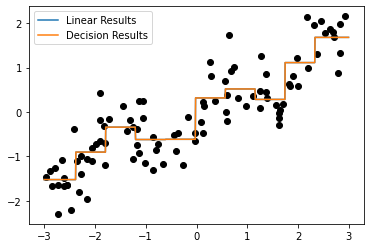

In [14]:
#plot results
plt.plot(X[:, 0], y, 'o', c='k')

plt.plot(X_test, linear_results, label="Linear Results")

plt.plot(X_test, decision_results, label="Decision Results")

plt.legend()

Build a linear regression model on staked data

In [18]:
#stack data

X_stacked = numpy.hstack([X, X_binned])

X_test_stacked = numpy.hstack([X_test, X_test_binned])

print(X_stacked)

[[-0.75275929  0.          0.         ...  0.          0.
   0.        ]
 [ 2.70428584  0.          0.         ...  0.          0.
   1.        ]
 [ 1.39196365  0.          0.         ...  1.          0.
   0.        ]
 ...
 [-0.43475389  0.          0.         ...  0.          0.
   0.        ]
 [-2.84748524  1.          0.         ...  0.          0.
   0.        ]
 [-2.35265144  0.          1.         ...  0.          0.
   0.        ]]


In [19]:
#use linear regression model on stacked data
model = LinearRegression()

model.fit(X_stacked, y)

results = model.predict(X_test_stacked)


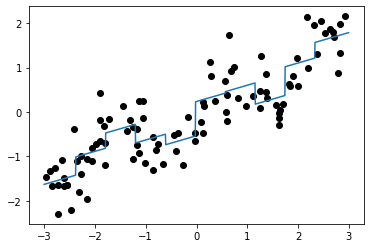

In [20]:
#plot results

plt.plot(X[:, 0], y, 'o', c='k')

plt.plot(X_test, results)